## **Associated Notebooks**

The associated notebooks for this project are located within the main repository: https://github.com/andrespineda/UC_Berkeley_MLAI_Capstone


* **Data Prep Notebook:** WESAD_Data_Preprocessing.ipynb

* **Data Analysis and Modeling:** HRV_Stress_Detection.ipynb


## Table of Contents
* [Introduction](#Introduction)
* [Methodology](#Methodology)
* [Understanding the Business](#Understanding-the-Business)
* [Understanding the Data](#Understanding-the-Data)
* [Data Preparation](#Data-Preparation)
* [Modeling](#Modeling)
* [Evaluation](#Evaluation)
* [References](#References)


# **Introduction**

This project was developed as the Capstone Project to the UC Berkeley Professional Certificate in Machine Learning and Artificial Intelligence Program. The program provides practical insights into the business applications of ML and AI technologies(UC Berkeley Executive Education., n.d.)
## **Methodology**

The Data Analysis will use the Cross Industry Standard Process for Data Mining (CRISP-DM) method
(Schröer, et al, 2021) of data analysis.
<img src="https://drive.google.com/uc?export=view&id=1Yp9cIXrpcM5DzDSvAsFOSyjmx9HEc-h4" width="200" align="right">
**CRISP-DM**

The CRISP-DM (Cross-Industry Standard Process for Data Mining) approach
to data analysis involves six major steps as outlined below:

1. **Understanding the Business:** This initial step involves conducting an
  in-depth analysis of the business objectives and needs. It includes
  assessing the current situation, defining goals based on insights, and
  setting up a plan to proceed.

2. **Understanding the Data:** In this phase, data is collected from various
  sources, its format and type are determined, and the data is profiled.
  Tasks include exploring the data, describing it, and ensuring its
  quality, accuracy, and validity.

3. **Data Preparation:** Careful selection, cleansing, construction, and formatting of the data are carried out in this step. The data are organized for modeling, and information exploration is conducted to
identify patterns aligned with business insights.

4. **Modeling:** The modeling phase involves selecting modeling techniques,
  generating test scenarios for validation, building various models, and
  assessing them to ensure alignment with business objectives

5. **Evaluation:** During this phase, the results of the models are evaluated
  against business intentions. Multiple models are assessed to determine
  which one best meets the project's goals.

6. **Deployment/Communication:** The final step involves presenting the
  gathered information in a usable manner to stakeholders according to
  their expectations and business requirements. This phase may vary in
  complexity based on numerous factors.

  # **1. Understanding the Business**

## **Background**


Research shows that stress is a major issue for<img src="https://drive.google.com/uc?export=view&id=1lhWuOVyyRi0MuDxuDNNO4S6o6ny7XZ8s" width="200" align="right"> young adults. A 2022 survey found that young adults aged 18–24 reported 5.8 out of 10 stress-related symptoms, compared to a 3.8 score of those aged 65 and older. Stress is also linked to many health issues, including heart disease, cancer, lung ailments, accidents, cirrhosis of the liver, and suicide (Statista, 2023).

Some indications of the ill effects of stress can be visually identified without special equipment, but sustained long term stress may cause internal issues
that are not easily detected. The common method <img src="https://drive.google.com/uc?export=view&id=1j8YOQrziHwoCIfbzYkQ2XteYd3isumgK" width="80" align="right">of measuring underlying stress conditions requires a trip to a medical facility where expensive medical equipment is used by trained clinicians.

If there was a way that a person could accurately and inexpensively measure their stress levels without going to a clinic, they could use that information as feedback so that they could learn to monitor and control their stress levels on their own.
## **Capstone Research Question**

Can commonly available wearable devices be used to accurately self-monitor stress levels?

##**Business Objective**

The business objective is to develop a machine learning classification model that is capable of determining whether heart rate samples collected from a wearable device can accurately detect stress patterns.
<img src="https://drive.google.com/uc?export=view&id=1zFLLzvzUrRhbGLWCeul-OlYxkslJKq-0" width="100" align="right">
 The heart beat cadence, the time interval between beats, has been proven to be a reliable indicator of stress.  Counterintuitively, a predictive pattern of regular time intervals is indicative of a stress situation. A non stressful measurement will include a variation in the pattern of beats. HRV, or Heart Rate Variability, is a medical term for the measurement of the variation in time between each heartbeat.

Collected HRV data will be used to train a classification model. By <img src="https://drive.google.com/uc?export=view&id=1W2hHDY8_hInFz-_-raeMBFiXqphtDkjA" width="100" align="right">training a classification model  we will be able to take measurements of HRV and determine whether someone is stressed or not. We will use labeled datasets that have been captured during stressful conditions for training.  The labeled data will be used to teach the model to recognize patterns that differentiate between the two conditions. Once trained, the model will be able to classify new input files of HRV data with accuracy, allowing us to better understand the relationship between HRV and stress.

## **Why is this important?**

<img src="https://drive.google.com/uc?export=view&id=1xofI99rMfYiWtCE8PSsJXvzjCfgqjZn3" width="100" align="right">
The use of an inexpensive wearable device to capture, classify, and present a visual indicator of a person's stress level can help reduce a serious problem faced by young adults. This tool would allow a person to self-monitor and control their stress levels without the need for expensive clinical equipment or visits to a medical facility.

## **How can this be achieved?**

Heart Rate Variability (HRV) is a powerful physiological indicator<img src="https://drive.google.com/uc?export=view&id=1jeUsZPxOzvNFpd7VMAK3xyGm88wX7rEy" width="200" align="right"> that provides valuable insights into the functioning of the autonomic nervous system, particularly the parasympathetic branch (Cleveland Clinic, 2021). HRV measures the variation in time between successive heartbeats, reflecting the body's ability to adapt to changing circumstances and stress levels.


The parasympathetic nervous system, often referred to as the "rest and digest" system, plays a crucial role in maintaining balance and promoting relaxation in the body. When stress levels increase, the parasympathetic system's activity typically decreases, leading to a reduction in HRV.

Monitoring HRV can provide important clues about an individual's stress levels and overall well-being:

1. Stress detection: Lower HRV often indicates higher stress levels and reduced parasympathetic activity.<img src="https://drive.google.com/uc?export=view&id=1MsSCxt7vQmbkMZQxNFHIShIcDXqqDERH" width="400" align="right">

2. Recovery assessment: HRV can help evaluate how well the body recovers from physical or mental stressors.

3. Health indicator: Chronically low HRV may signal increased risk for various health issues, including cardiovascular problems and mental health disorders.

4. Biofeedback tool: HRV measurements can be used to help individuals learn to manage stress more effectively through techniques like deep breathing and meditation (Biofeedback-Neurofeedback-Therapy.com, n.d.).

By tracking HRV over time, individuals can gain valuable insights into stress levels and parasympathetic nervous system function. This information can be used to implement targeted interventions and lifestyle changes to improve overall health and well-being.

## **Business Expected Results**

It is expected that a classification model can be <img src="https://drive.google.com/uc?export=view&id=17T01ru8CDzj_pRrUQp9KhFqX8jnUFrzF" width="100" align="right">developed that can accurately classify stress level categories using a sampling of HRV data. Ideally, a short sampling period of one to three minutes will be sufficient for the model to classify the stress level during the sampling period.

With the proliferation of wearble technology, such as a wrist or arm-band heart rate monitor, an Apple watch, or even a smartphone with a
camera, there are new opportunities to capture HRV data. The captured data can be used by the trained classification model to assess the stress level of <img src="https://drive.google.com/uc?export=view&id=1sFKYDVTvq4tzEb3t3hqCwSWAKGXZLmwN" width="50" align="right">the person immediately after the data was captured. The results of the classification model need to be presented to the user via a easy to i-understand visual stress indicator on their smartphone. For example, a circular gauge that goes from blue for low stress to red to indicate high stress. Other similar user interfaces will be considered for ease of use and  effectiveness.


## **Business Success Criteria**

The success criteria will be based on meeting the following measurable results:

1. A classification model will developed that can take as input a one to three minute recording of a person's heart rate.
2. Based on the data provided, the classification model will be able to classify the readings into stressful and non-stressful periods of time according to the following metrics:

3. A Recall score (Sensitivity or True Positive rate) of 85%. It is important for the model to correctly identify True Positives. Being able to correctly identify stress from the reading is important so the person can take corrective action. In this problem, a high recall value is preferable than a high accuracy score.

4. The classification model will be able to classify the data within 15 seconds. The model will eventually operate within a smartphone and it wil be important for the user to be able to get a stress reading with a short time after taking a heart rate sample.

# **2. Understanding the Data**
## ****Data Sources****
Developing an accurate machine learning model requires training data of heart rate signals during various target conditions, such as subjects that were relaxed or under stressful circumstances.

An ideal data source was identified:


**WESAD**

WESAD (Wearable Stress and Affect Detection) contains data of 15 subjects during a stress-affect lab study, while wearing physiological and motion sensors. WESAD is a publicly available dataset for wearable stress and affect detection. This multimodal dataset features physiological and motion data, recorded from both a wrist- and a chest-worn device, of 15 subjects during a lab study. The following sensor modalities are included: blood volume pulse, electrocardiogram, electrodermal activity, electromyogram, respiration, body temperature, and three-axis acceleration. Moreover, the dataset bridges the gap between previous lab studies on stress and emotions, by containing three different affective states (neutral, stress, amusement). In addition, self-reports of the subjects, which were obtained using several established questionnaires, are contained in the dataset.(Schmidt, et.al., 2018)

 The original paper and links to download the dataset can be found via this link: https://archive.ics.uci.edu/dataset/465/wesad+wearable+stress+and+affect+detection


## ****Data Content****


 The WESAD dataset include Electrocardiogram (ECG) measures of various subjects during hours of stressing, amusing, relaxing, and neutral situations. Below is a table listing the ECG data field acronyms with their definitions, although a smaller subset will used:

| Acronym | Definition |
|---------|------------|
| MEAN_RR | Mean of RR intervals |
| MEDIAN_RR | Median of RR intervals |
| SDRR | Standard deviation of RR intervals |
| RMSSD | Root mean square of successive RR interval differences |
| SDSD | Standard deviation of successive RR interval differences |
| SDRR_RMSSD | Ratio of SDRR to RMSSD |
| HR | Heart rate |
| pNN25 | Percentage of successive RR intervals that differ by more than 25 ms |
| pNN50 | Percentage of successive RR intervals that differ by more than 50 ms |
| SD1 | Poincaré plot standard deviation perpendicular to the line of identity |
| SD2 | Poincaré plot standard deviation along the line of identity |
| KURT | Kurtosis of RR intervals |
| SKEW | Skewness of RR intervals |
| MEAN_REL_RR | Mean of relative RR intervals |
| MEDIAN_REL_RR | Median of relative RR intervals |
| SDRR_REL_RR | Standard deviation of relative RR intervals |
| RMSSD_REL_RR | Root mean square of successive differences of relative RR intervals |
| SDSD_REL_RR | Standard deviation of successive differences of relative RR intervals |
| SDRR_RMSSD_REL_RR | Ratio of SDRR to RMSSD for relative RR intervals |
| KURT_REL_RR | Kurtosis of relative RR intervals |
| SKEW_REL_RR | Skewness of relative RR intervals |
| VLF | Very low frequency power |
| VLF_PCT | Very low frequency power as a percentage of total power |
| LF | Low frequency power |
| LF_PCT | Low frequency power as a percentage of total power |
| LF_NU | Low frequency power in normalized units |
| HF | High frequency power |
| HF_PCT | High frequency power as a percentage of total power |
| HF_NU | High frequency power in normalized units |
| TP | Total power |
| LF_HF | Ratio of low frequency to high frequency power |
| HF_LF | Ratio of high frequency to low frequency power |

## ****Data Sample****

Below is a sample of the ECG signal from this data:

<img src="https://drive.google.com/uc?export=view&id=1b099kPnzgVwOsjYIITwKOK91UfO2YK0U" width="500">

The data is complex and there are too many variables to work with. Below is a small sample of the dataset:

## ****Data Prep****

Data preparation is a key step in the data analysis process, laying the foundation for accurate and meaningful insights. This phase involves several key tasks to ensure the data is clean, consistent, and ready for analysis. Initially, data must be collected from the WESAD datasetand consolidated into a unified format. Raw data often contains errors, missing values, and inconsistencies that need to be addressed through data cleaning techniques such as removing duplicates, handling missing values, and correcting formatting issues. Data transformation may be necessary to convert variables into appropriate formats or to create derived features that enhance the analysis. Normalization and standardization techniques are often applied to ensure comparability across different scales.  Finally, data reduction techniques like feature selection or dimensionality reduction may be employed to focus on the most relevant variables and improve computational efficiency. This comprehensive data preparation process is vital for producing reliable and actionable insights in subsequent analysis stages.

Below is the process that will be used in this project:


<img src="https://drive.google.com/uc?export=view&id=1o5_aqAuQWl_M5e7BRnIiHL_1m2vwR63x" >


## ****Heart Rate Variability****

From this inital analysis of the data, we must isolate the heart beats. Our goal is to detrend the ECG time series data and then apply stationary algorythms to isolate the individual wave forms.

### ***Identify the Peaks***

Identifying the peaks is critical to calulating the inter-beat interval. It must be calculated with accuracy as the variation between the beats is used to determine the HRV values.

Below is a sample plot showing the identification of the peaks.


<img src="https://drive.google.com/uc?export=view&id=11LCMYb-TeIgD1Nn0l6MDdrHRMJcFG9wJ" >


Now that the peaks are identified and the heart beat wave is stationary, we can calculate the distribution of RR Intervals. The RR Intervals are the distance between the peaks.

Below is a plot of the distribution of RR intervals in the dataset.  We must eliminate the outliers and then use the distribution to begin classification based on the labeled dataset.

<img src="https://drive.google.com/uc?export=view&id=1SBdilIaPJvgaIPsAkfyhG8jhMVXoY_Sr" >

Another useful plotting method is to use a PoincarePlot. This plot compares each RR interval from the next and plots it as a 2 dimensional plot.

<img src="https://drive.google.com/uc?export=view&id=1A-ZgRLHq0WyrSEjNqdetCvF0NFXbgGL_" >

# **4. Modeling**

** In Progress**

# **5. Evaluation**

** In Progress**

### **Evaluate Model Results**

** In Progress**

### **Model Results vs Business Criteria**

** In Progress**

### **Next Steps**

** In Progress**

# **References**

* Biofeedback-Neurofeedback-Therapy.com. (n.d.). HRV biofeedback in the treatment of various disorders.  https://biofeedback-neurofeedback-therapy.com/hrv-biofeedback/

* Cleveland Clinic. (2021, September 1). Heart rate variability (HRV): What it is and how you can track it. https://my.clevelandclinic.org/health/symptoms/21773-heart-rate-variability-hrv


* Koldijk, S., Sappelli, M., Verberne, S., Neerincx, M.A., & Kraaij, W. (2014). The SWELL Knowledge Work Dataset for Stress and User Modeling Research. _Proceedings of the 16th International Conference on Multimodal Interaction_.

* Kraaij, Prof.dr.ir. W. (Radboud University & TNO); Koldijk, MSc. S. (TNO & Radboud University); Sappelli, MSc M. (TNO & Radboud University) (2014): The SWELL Knowledge Work Dataset for Stress and User Modeling Research. DANS. https://doi.org/10.17026/dans-x55-69zp

* Nkurikiyeyezu, K., Yokokubo, A., & Lopez, G. (2020). The Effect of Person-Specific Biometrics in Improving Generic Stress Predictive Models. Journal of Sensors & Material, 1–12. http://arxiv.org/abs/1910.01770

* Schmidt, P., Reiss, A., Duerichen, R., Marberger, C., & Van Laerhoven, K. (2018). Introducing WESAD, a Multimodal Dataset for Wearable Stress and Affect Detection. Proceedings of the 2018 on International Conference on Multimodal Interaction - ICMI ’18, 400–408. https://doi.org/10.1145/3242969.3242985

* Statista. (2023, November 29). People experiencing stress, depression, and anxiety symptoms by age group worldwide 2022_. Health, Pharma & Medtech_.
* UC Berkeley Executive Education. (n.d.). Professional Certificate in Machine Learning and Artificial Intelligence.  https://em-executive.berkeley.edu/professional-certificate-machine-learning-artificial-intelligence








---



In [3]:
!pip install mrmr_selection
!pip install mrmr_classif
!pip install neurokit2

ERROR: Could not find a version that satisfies the requirement mrmr_classif (from versions: none)
ERROR: No matching distribution found for mrmr_classif


### Import Libraries


In [4]:
import json
import matplotlib.pyplot as plt

import neurokit2 as nk
import numpy as np
import os
import pandas as pd
import pickle
import random
import scipy
import seaborn as sns
import sklearn.metrics
import time
from IPython.display import clear_output

from scipy import signal
from scipy import stats
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


### Load Data from Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read in the ECG file from the WESAD Dataset as it contains ECG data.

In [7]:
df = pd.read_pickle('/content/drive/MyDrive/merged_chest.pkl')
df.columns

Index(['sid', 'acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp',
       'label'],
      dtype='object')

The ECG data is a limited set of features that are still useful for calculating HRV values.


In [8]:
df.head()

,sid,acc1,acc2,acc3,ecg,emg,eda,temp,resp,label
0,2.0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,2.0,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,2.0,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,2.0,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,2.0,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0


In [9]:
df['label'].value_counts()
#

label
0.0    11678798
1.0     4074001
4.0     2753800
2.0     2229500
3.0     1298500
7.0      225401
6.0      189000
5.0      177800
Name: count, dtype: int64

The label contains the target values. Limit to 1,2,3

In [85]:
df_fltr = df[df["label"].isin([1,2,3])]

In [13]:
df_fltr.groupby(['sid', 'label']).count()

acc1    acc2    acc3     ecg     emg     eda    temp    resp
sid label                                                                
2.0 1.0    800800  800800  800800  800800  800800  800800  800800  800800
    2.0    430500  430500  430500  430500  430500  430500  430500  430500
    3.0    253400  253400  253400  253400  253400  253400  253400  253400
3.0 1.0    798000  798000  798000  798000  798000  798000  798000  798000
    2.0    448000  448000  448000  448000  448000  448000  448000  448000
    3.0    262500  262500  262500  262500  262500  262500  262500  262500
4.0 1.0    810601  810601  810601  810601  810601  810601  810601  810601
    2.0    444500  444500  444500  444500  444500  444500  444500  444500
    3.0    260400  260400  260400  260400  260400  260400  260400  260400
5.0 1.0    838600  838600  838600  838600  838600  838600  838600  838600
    2.0    451500  451500  451500  451500  451500  451500  451500  451500
    3.0    261800  261800  261800  261800  261800  261800  261800  261800
6.0 1.0    826000  826000  826000  826000  826000  826000  826000  826000
    2.0    455000  455000  455000  455000  455000  455000  455000  455000
    3.0    260400  260400  260400  260400  260400  260400  260400  260400

In [14]:
# 1 = baseline, 2 = stress, 3 = amusement
perc_data = df_fltr.label.value_counts()
perc_data

label
1.0    4074001
2.0    2229500
3.0    1298500
Name: count, dtype: int64

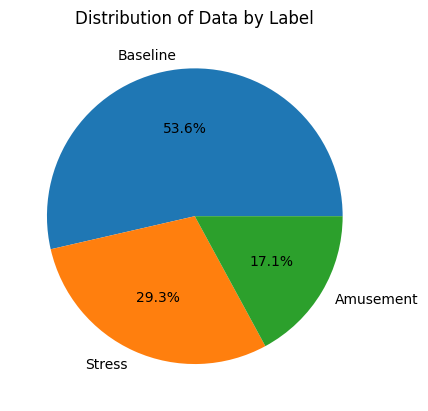

In [16]:
# We will now create a pie chart of the perc data using the labels: 1 = Baselne, 2 = stress, 3 = amusement

import matplotlib.pyplot as plt

# Define labels and values
labels = ['Baseline', 'Stress', 'Amusement']
values = [perc_data[1], perc_data[2], perc_data[3]]

# Create a pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%")

# Add title
plt.title("Distribution of Data by Label")

# Show the pie chart
plt.show()


## More data exploration

<Axes: >

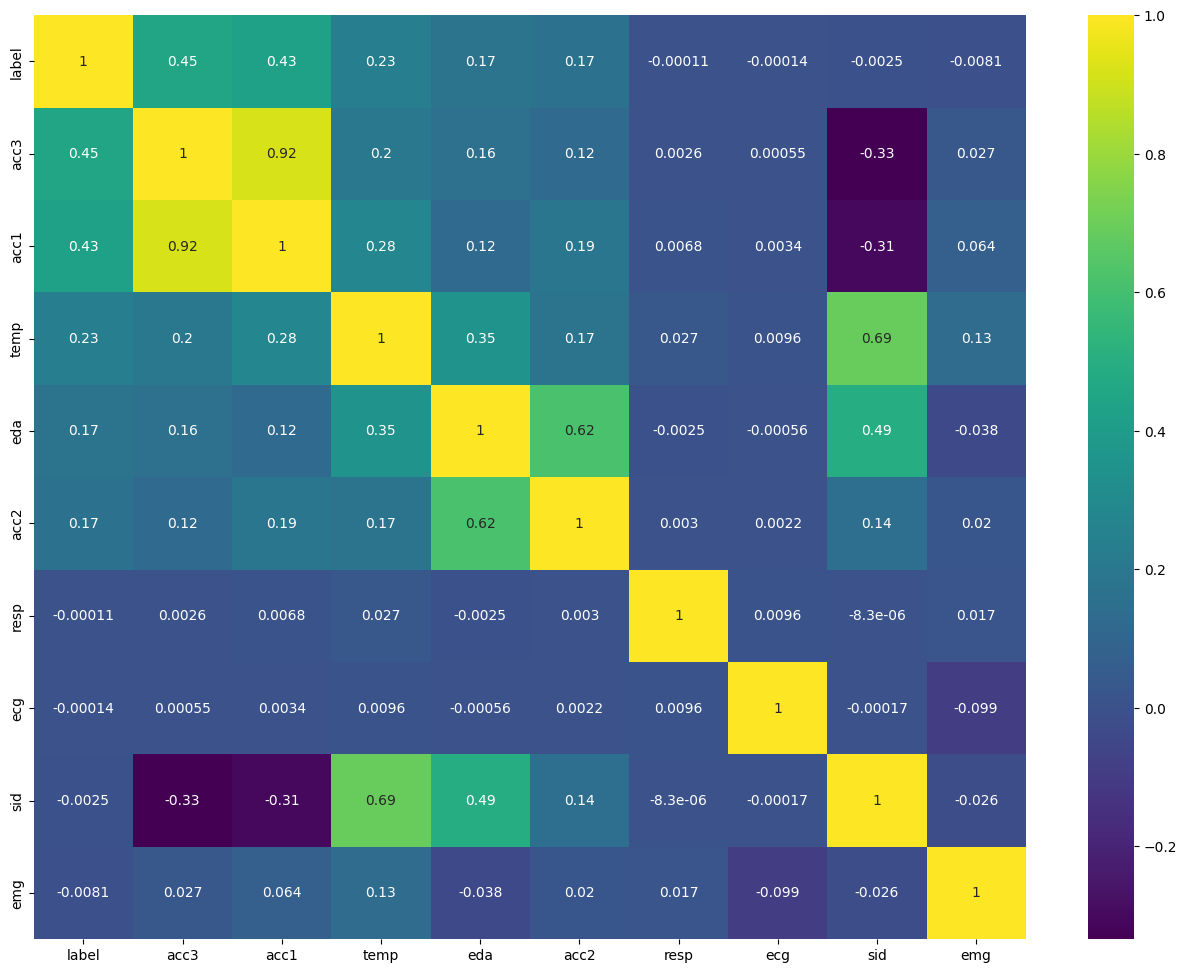

In [17]:
# Label correlation matrix
k = 15 #number of variables for heatmap
cols = df_fltr.corr().nlargest(k, 'label')['label'].index
cm = df_fltr[cols].corr()
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')


## *** Note: Due to time constraints, we will use a small subset of the data. This will cause the resulting plots and calcualtions to be inaccurate and representative of the entire data set.

In [64]:
N = 500000
feat_cols = ['acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp']
df_subset = df.sample(n=N, random_state=42)
data_subset = df_subset[feat_cols].values

In [65]:
df_fltr.columns.values

array(['sid', 'acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp',
       'label'], dtype=object)

In [66]:
df_subset.head()

,sid,acc1,acc2,acc3,ecg,emg,eda,temp,resp,label
17733190,6.0,0.5434,-0.0754,-0.7752,-0.033005,-0.002747,11.299133,33.049896,4.071045,0.0
13191713,4.0,0.9150,-0.0354,-0.0704,-0.009293,0.015701,2.494049,33.648865,4.499817,0.0
2091620,2.0,0.8712,-0.1142,-0.3132,0.007553,-0.010025,2.463150,30.472900,-1.065063,0.0
1307690,2.0,0.8392,-0.1862,-0.3750,0.031357,0.004395,1.116943,31.081268,3.425598,0.0
4823065,3.0,0.8358,-0.0476,-0.4062,-0.028015,0.014694,6.750870,30.802887,0.372314,1.0


In [67]:
df_fltr.head()

,sid,acc1,acc2,acc3,ecg,emg,eda,temp,resp,label
214583,2.0,0.8914,-0.1102,-0.2576,0.030945,-0.003708,5.710983,29.083618,1.191711,1.0
214584,2.0,0.8926,-0.1086,-0.2544,0.033646,-0.014145,5.719376,29.122437,1.139832,1.0
214585,2.0,0.8930,-0.1094,-0.2580,0.033005,0.010208,5.706406,29.115234,1.141357,1.0
214586,2.0,0.8934,-0.1082,-0.2538,0.031815,0.012634,5.712509,29.126709,1.155090,1.0
214587,2.0,0.8930,-0.1096,-0.2570,0.030350,0.002060,5.727005,29.100861,1.133728,1.0


In [ ]:
# Preprocess ECG signal
signals, info = nk.ecg_process(df['ecg'], sampling_rate=700)

# Visualize
nk.ecg_plot(signals, info)

In [72]:
# Find peaks
peaks, info = nk.ecg_peaks(signals["ECG_Clean"], sampling_rate=700)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,1124.299234,797.431129,138.085521,793.779346,84.20896,795.722022,NaN,NaN,1105.523455,1106.397667,...,838.571429,0.721315,533.714286,1601.142857,95.11041,97.634069,301.428571,5361.428571,45.285714,281.25


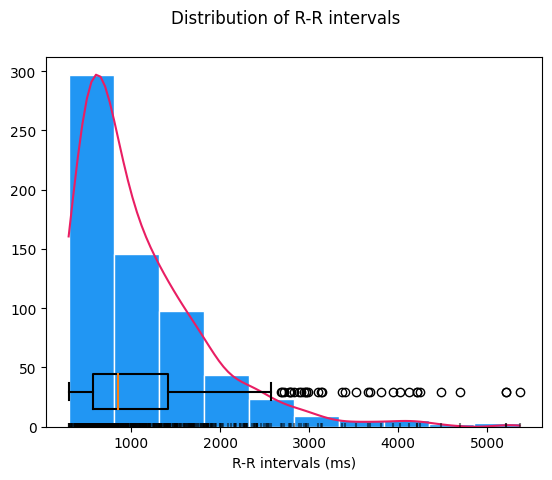

In [73]:
# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(peaks, sampling_rate=700, show=True)
hrv_time

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,782.341293,812.565674,0.962804,1.997122e+06,1.038633,7.007375,3375.830887,0.641956,0.643987,0.882064,...,1.61164,8.840346,1.337028,0.858173,1.418045,1.564629,1.491244,1.996809,3.422394,1.042417


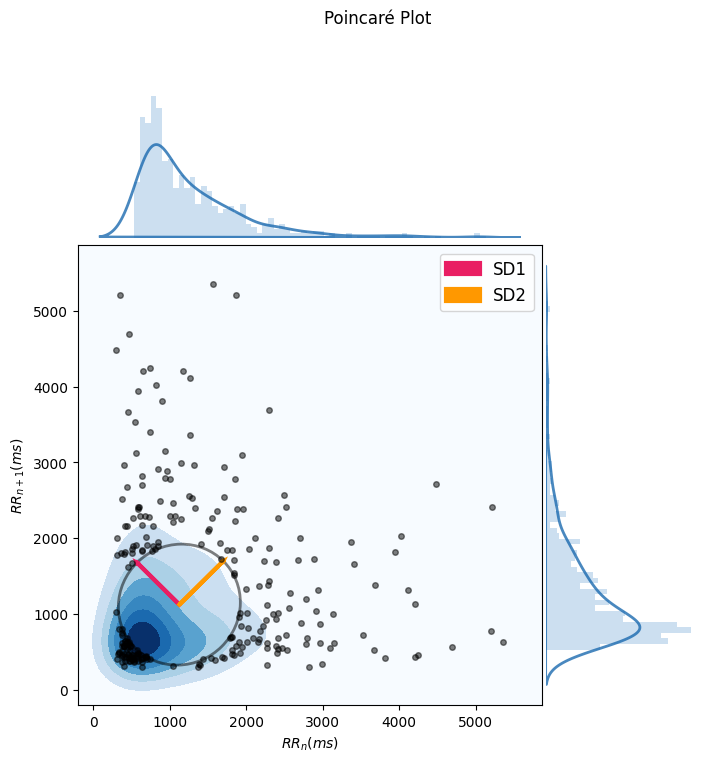

In [84]:
hrv_nonlinear = nk.hrv_nonlinear(peaks, sampling_rate=700, show=True)
hrv_nonlinear

In [2]:
# Load the ECG data
data = df

# Process the ECG data to extract peaks
ecg_signals, info = nk.ecg_process(data["ecg"], sampling_rate=700)

# Extract HRV features
hrv_features = nk.hrv(ecg_signals, sampling_rate=700)
# Assuming 'label' is your target variable in the dataset
# Add the target variable to the HRV features DataFrame
# Replace 'target_column' with the actual name of your target column
hrv_features['label'] = data['target_column']

# Separate features and target
X = hrv_features.drop('label', axis=1)
y = hrv_features['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

In [ ]:




# Define the models and their parameter grids
models = {
    'KNN': (KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7, 9]}),
    'SVM': (SVC(), {'model__C': [0.1, 1, 10], 'model__kernel': ['rbf', 'linear']}),
    'Logistic Regression': (LogisticRegression(), {'model__C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]})
}

# Create and evaluate the models
for name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    print(f"\n{name} Results:")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [82]:
# Load the data into a pandas DataFrame
df = dfs
# Define the group column (subject IDs)
group_col = 'subject_id'
# Define the test size (30%)
test_size = 0.3
# Initialize empty lists to store the training and test data
X_train = []
X_test = []
y_train = []
y_test = []
# Split the data by subject ID and combine the training data
for group_id, group_data in df.groupby(group_col):
    # Split the group data into training and test sets
    X_group_train, X_group_test, y_group_train, y_group_test = train_test_split(
        group_data.iloc[:, :-2],  # features only
        group_data.iloc[:, -1],   # label only
        test_size=test_size,      # test size ~= 30%
        random_state=123,stratify=group_data.iloc[:, -1] # for reproducibility
    )
    # Append the training and test data to the respective lists
    X_train.append(X_group_train)
    X_test.append(X_group_test)
    y_train.append(y_group_train)
    y_test.append(y_group_test)
# Combine the training data from all subjects
X_train = pd.concat(X_train)
y_train = pd.concat(y_train)



# select top 8 features using mRMR
selected_features = mrmr_classif(X=X_train, y=y_train, K=8)
print(selected_features)
x_train=X_train[selected_features]



# Define the k-fold cross-validation object
kfold = StratifiedKFold(n_splits=15, shuffle=True,random_state=123)
best_model = None
best_score = 0


# Start the timer
start_time = time.time()

# Train the model using k-fold cross-validation
model = GradientBoostingClassifier(max_depth=20, min_samples_split=2, n_estimators=100)
# Train and validate the model using k-fold cross-validation
for train_index, val_index in kfold.split(x_train,y_train):
    X_train_kf, X_val = np.array(x_train)[train_index], np.array(x_train)[val_index]
    y_train_kf, y_val = np.array(y_train)[train_index], np.array(y_train)[val_index]
    # Fit the model on the training set and the validation set
    model.fit(X_train_kf, y_train_kf)
    # Compute the score on the validation set
    y_pred_val = model.predict(X_val)
    val_score = accuracy_score(y_val, y_pred_val)
    print(f"Validation score: {val_score:.4f}")
    # Save the model if it is the best one so far
    if val_score > best_score:
        best_score = val_score
        best_model = model

# Iterate over the test data for each subject and evaluate the model
for i in range(len(X_test)):
    # Evaluate the model on the test data for the i-th subject
    y_pred = best_model.predict(X_test[i][selected_features])
    test_score = accuracy_score(y_test[i], y_pred)
    print(f"Test score for subject {i+1}: {test_score:.4f}")
    # Compute the precision, recall, and F1 score for each class
    report = classification_report(y_test[i], y_pred)
    print(f"Classification report for subject {i+1}:\n{report}\n")
# End the timer
end_time = time.time()
# Calculate the computational time
computational_time = end_time - start_time
print("Computational time:", computational_time)

NameError: name 'dfs' is not defined